In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import random
import seaborn as sns
!pip install chart-studio
import chart_studio
import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='tuenguyen92', api_key='slYjvo1SuYBSJrDEieDa')

In [40]:
#reading csv file

combined_countries= pd.read_csv("Happinessavg3.csv")


In [41]:
combined_countries=combined_countries.dropna()

In [42]:
combined_countries_without_year = combined_countries[['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [54]:
combined_countries_without_year.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [43]:
combined_countries_without_year.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,5.502645,9.363053,0.811693,64.715540,0.787424,-0.014848,0.730322
std,1.092111,1.180595,0.118102,6.907445,0.115492,0.150990,0.176912
min,2.523000,6.492642,0.319460,45.200001,0.382000,-0.300907,0.082000
25%,4.769400,8.483295,0.743481,59.302750,0.717000,-0.126761,0.675250
50%,5.524500,9.514612,0.831538,66.442253,0.800821,-0.035000,0.782061
75%,6.248375,10.356000,0.905750,69.568500,0.877532,0.082000,0.847724
max,7.842000,11.647000,0.983000,76.953000,0.974998,0.560664,0.939000


In [44]:
score_per_country = combined_countries.set_index(["Country or region"])["Score"]

In [45]:
score_per_country

Country or region
Finland        7.8087
Denmark        7.6456
Switzerland    7.5599
Iceland        7.5045
Norway         7.4880
                ...  
Lesotho        3.5120
Botswana       3.4670
Rwanda         3.4150
Zimbabwe       3.1450
Afghanistan    2.5230
Name: Score, Length: 302, dtype: float64

In [46]:
combined_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             302 non-null    object 
 1   GDP per capita                302 non-null    float64
 2   Social support                302 non-null    float64
 3   Healthy life expectancy       302 non-null    float64
 4   Freedom to make life choices  302 non-null    float64
 5   Generosity                    302 non-null    float64
 6   Score                         302 non-null    float64
 7   Perceptions of corruption     302 non-null    float64
 8   Year                          302 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 21.4+ KB


In [47]:
#separating the happiness score by year 

score_2020 = combined_countries[(combined_countries["Year"] == 2020)]
score_2021 = combined_countries[(combined_countries["Year"] == 2021)]

In [48]:
#Grouping by "country" and taking the mean of each.

country_score_2020 = score_2020.groupby(["Country or region"]).mean ()["Score"]
country_score_2021 = score_2021.groupby(["Country or region"]).mean ()["Score"]

In [49]:
scores_by_year = pd.DataFrame({
    "2020": country_score_2020,
    "2021": country_score_2021})

In [50]:
scores_by_year.sort_values(by=["2020", "2021"],ascending=False)

,2020,2021
Country or region,,
Finland,7.8087,7.842
Denmark,7.6456,7.620
Switzerland,7.5599,7.571
Iceland,7.5045,7.554
Norway,7.4880,7.392
...,...,...
Rwanda,3.3123,3.415
Zimbabwe,3.2992,3.145
South Sudan,2.8166,NaN


In [20]:
#Part II. Visualization

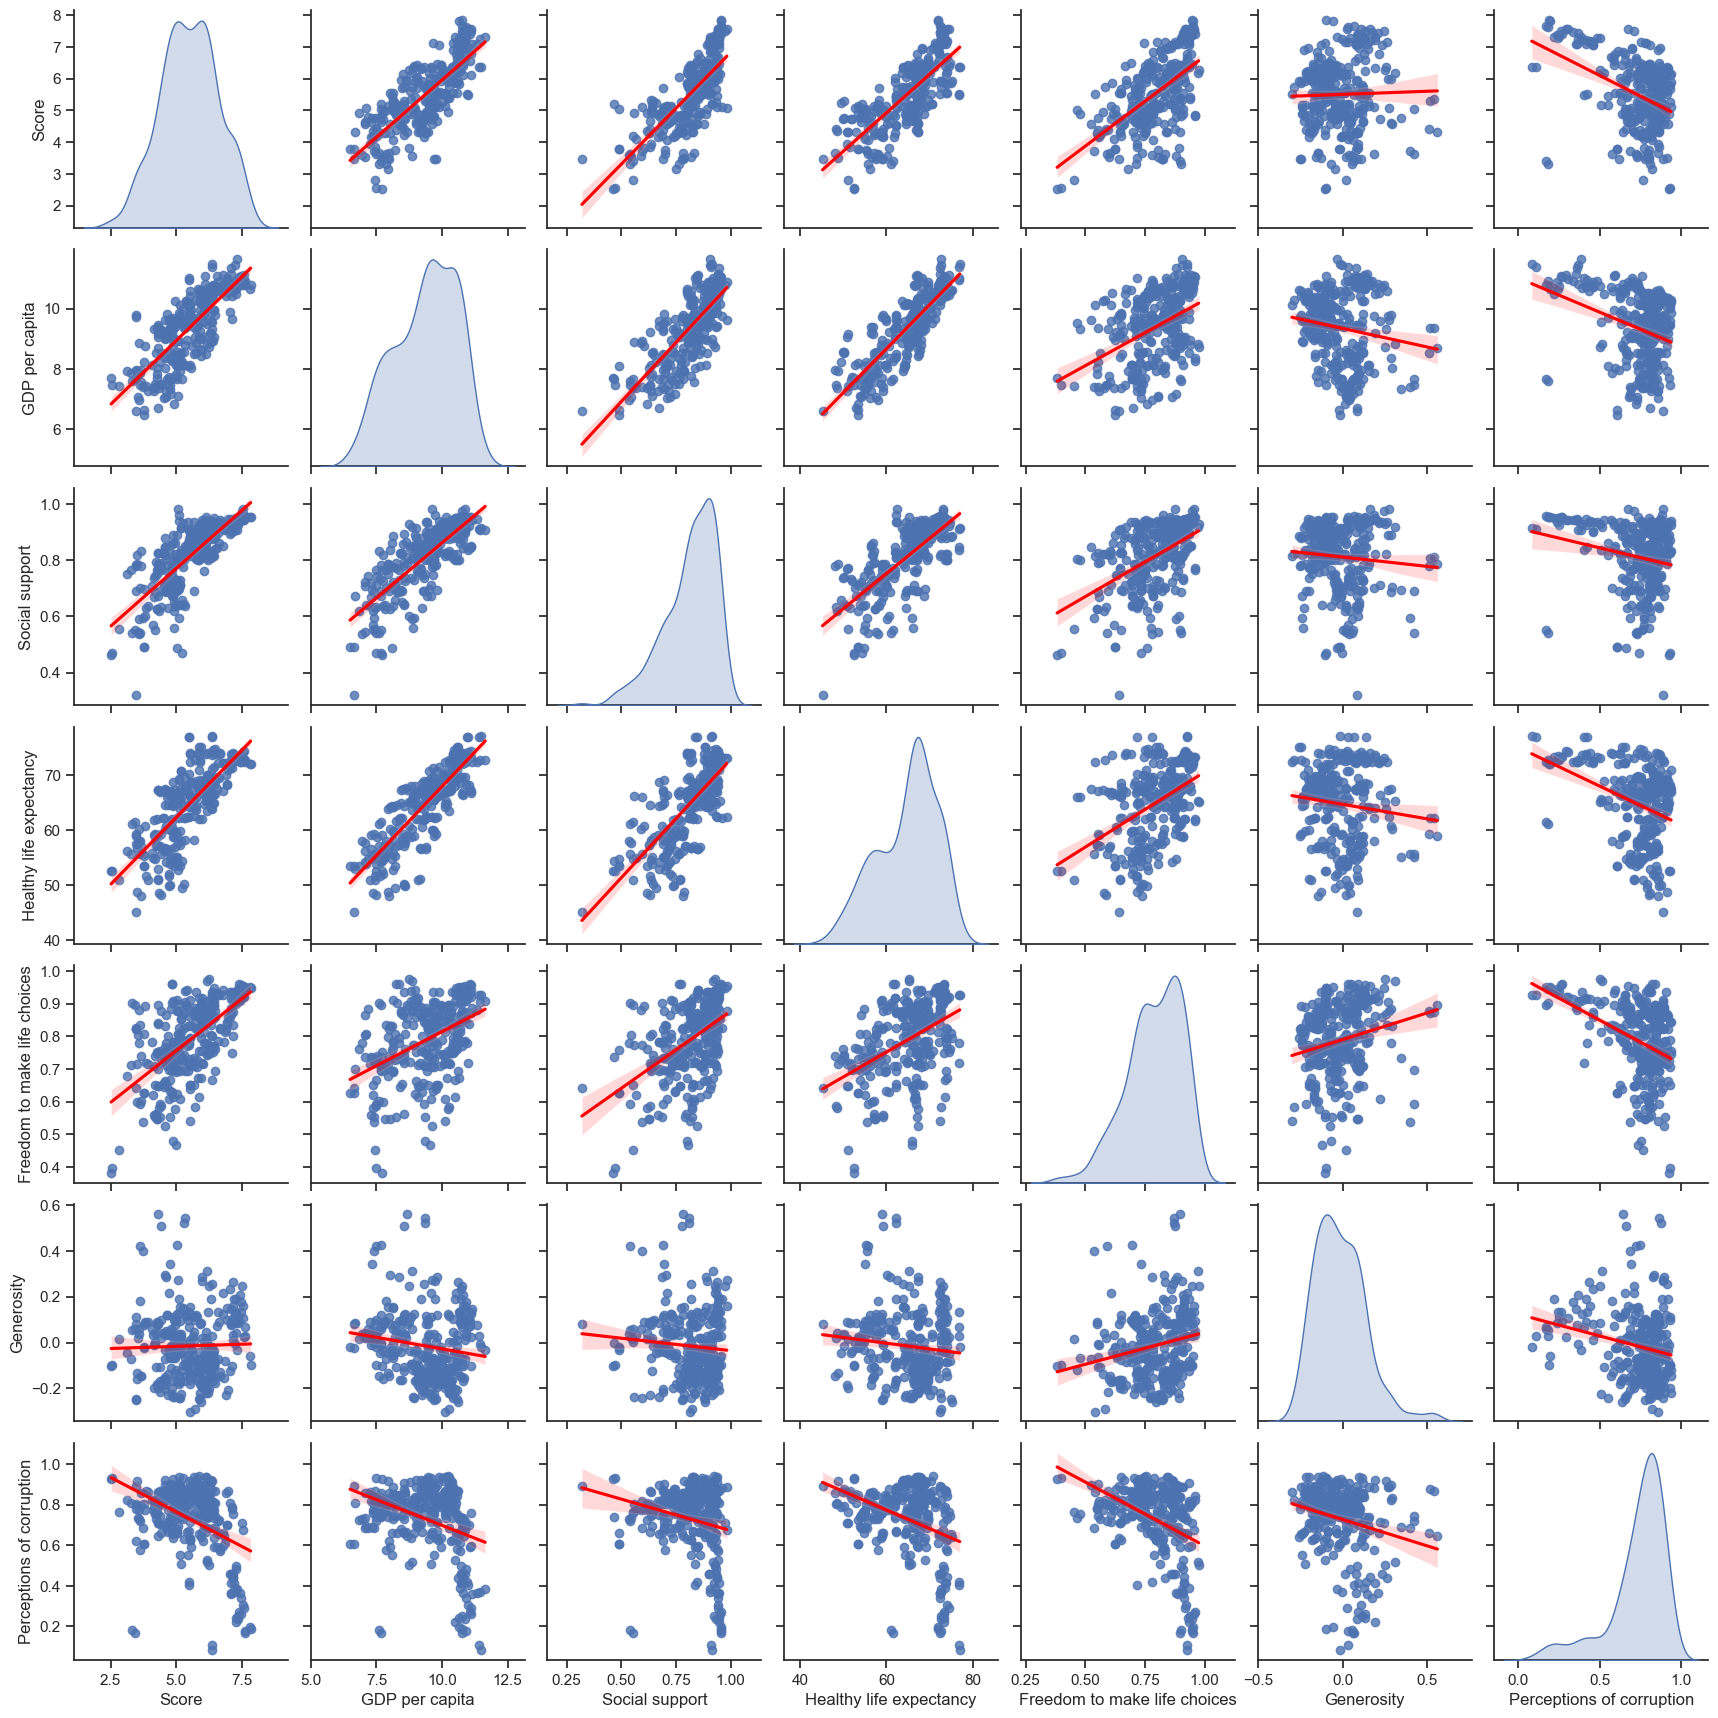

In [29]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(combined_countries_without_year, kind="reg", diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country or region'>

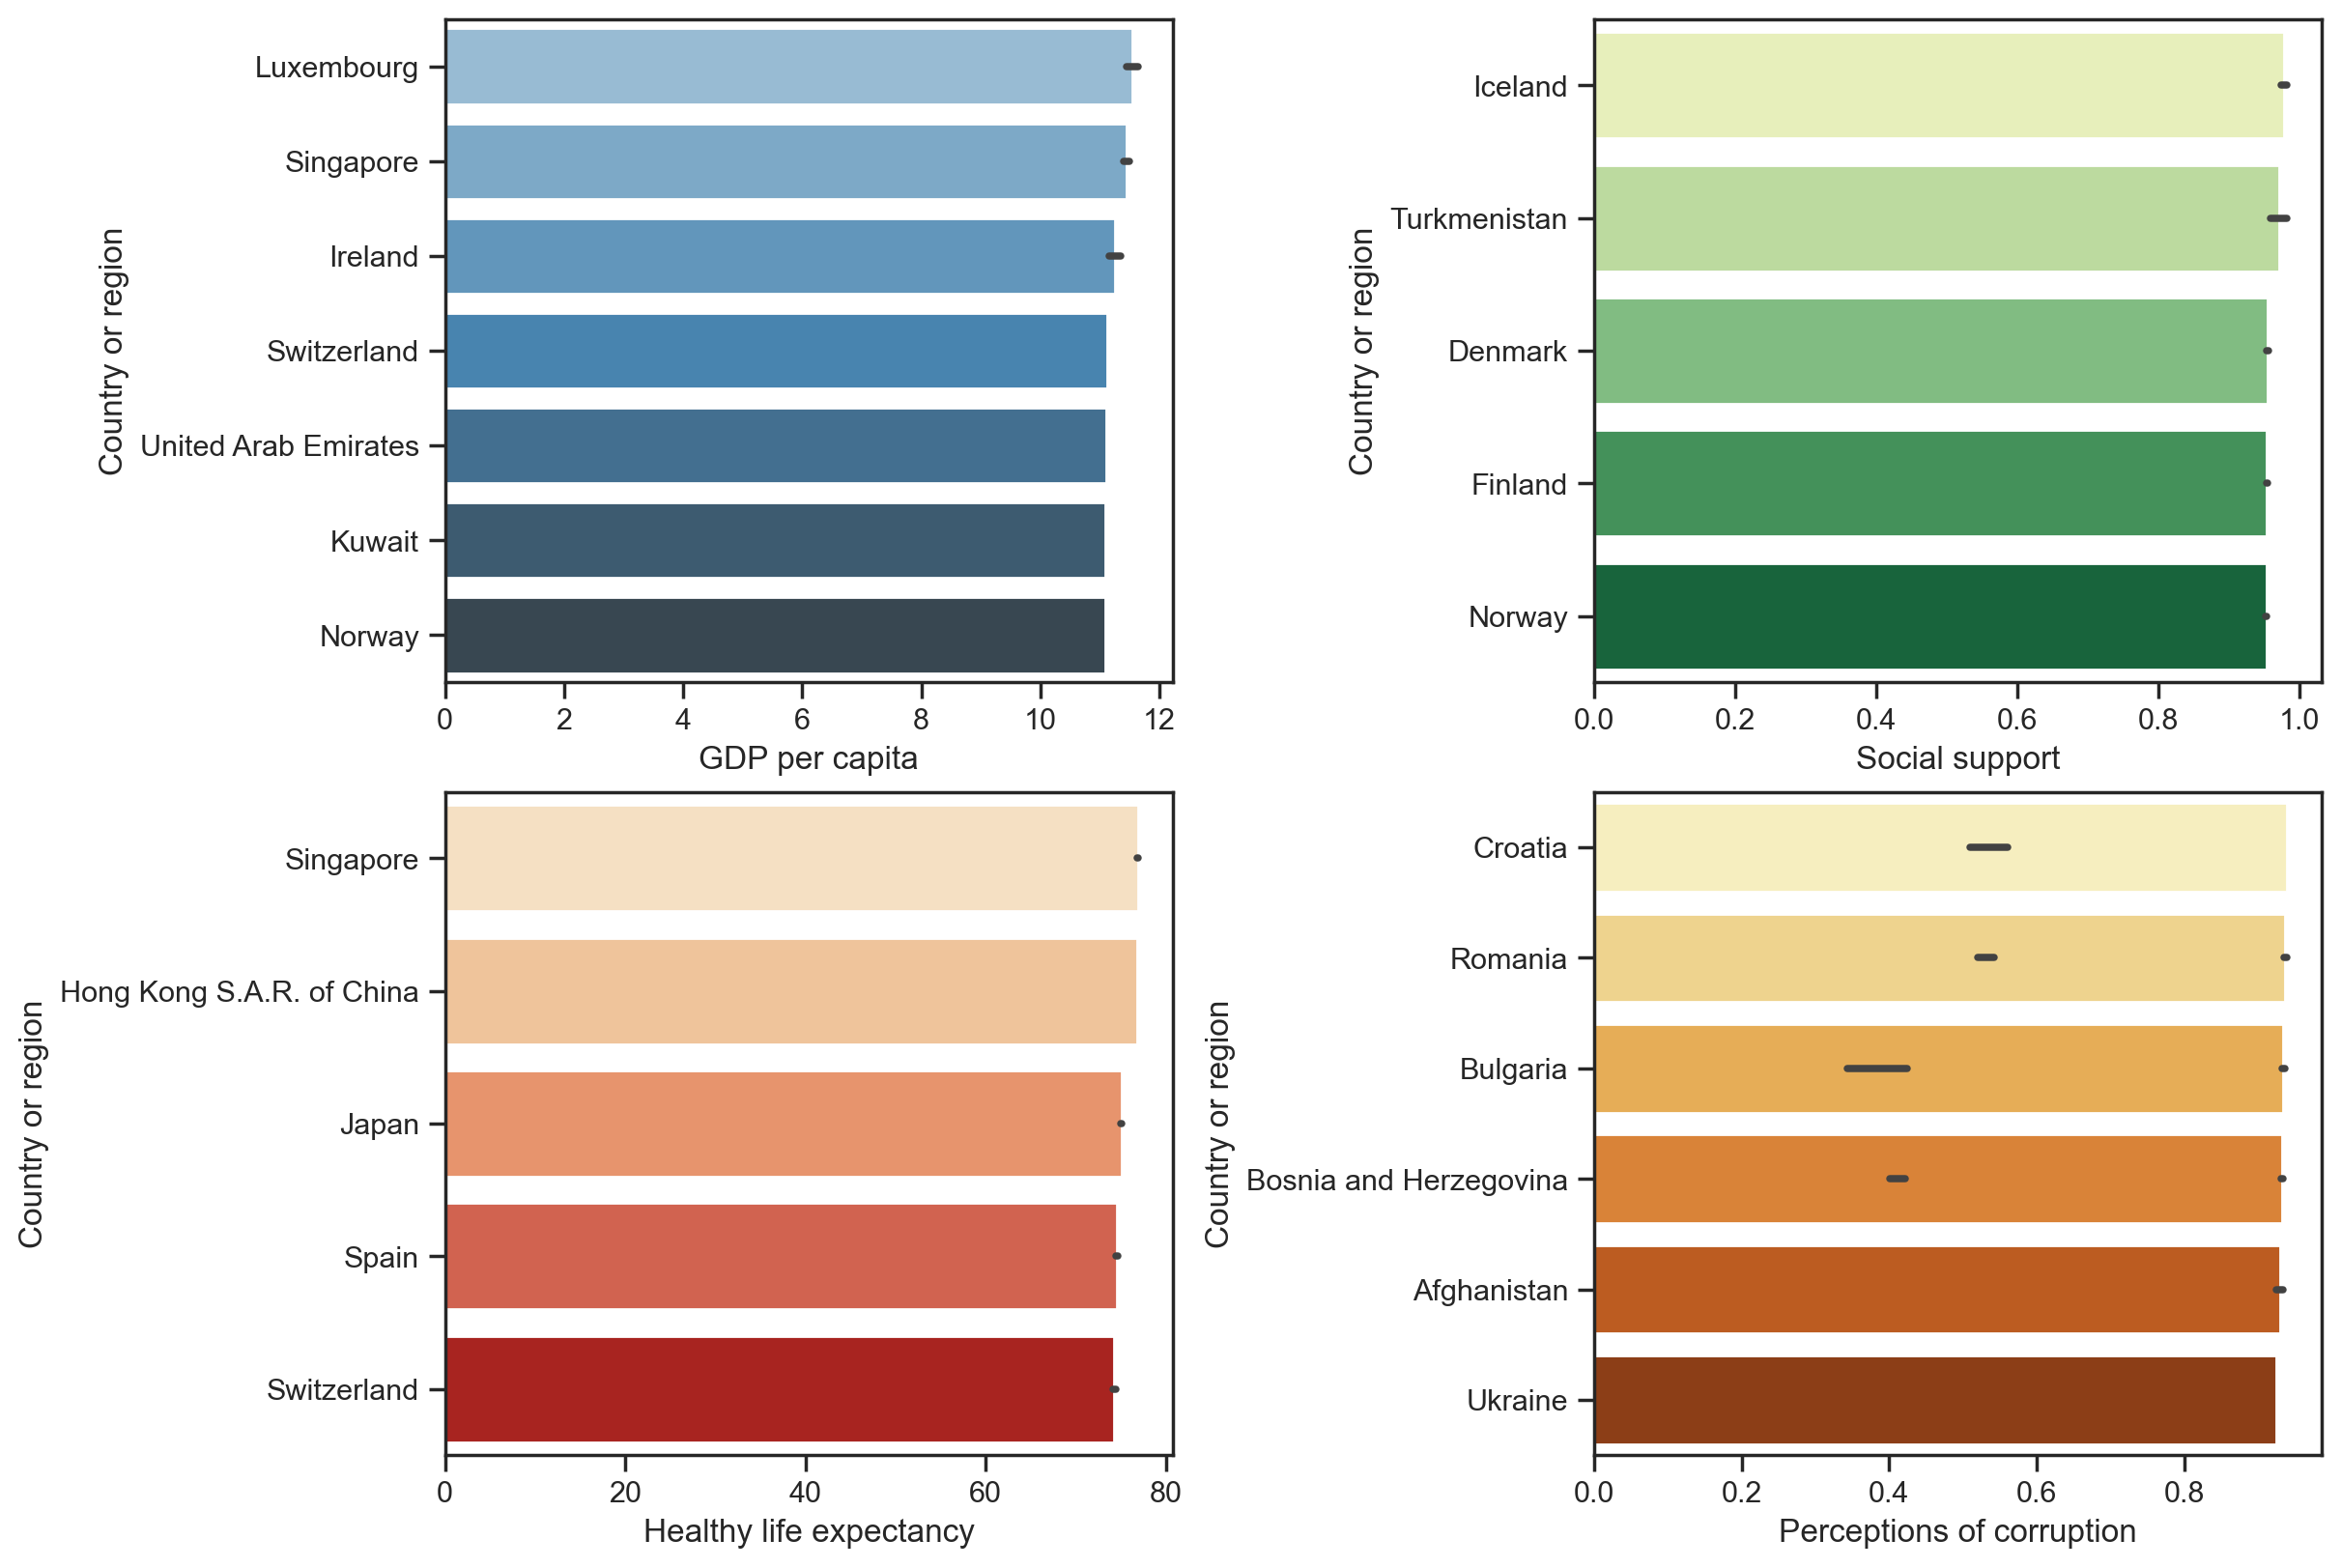

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=combined_countries.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")
sns.barplot(x='Social support' ,y='Country or region',data=combined_countries.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=combined_countries.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Generosity' ,y='Country or region',data=combined_countries.nlargest(10,'Generosity'),ax=axes[1,1],palette='YlOrBr')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=combined_countries.nlargest(10,'Perceptions of corruption'),ax=axes[1,1],palette='YlOrBr')



<AxesSubplot:>

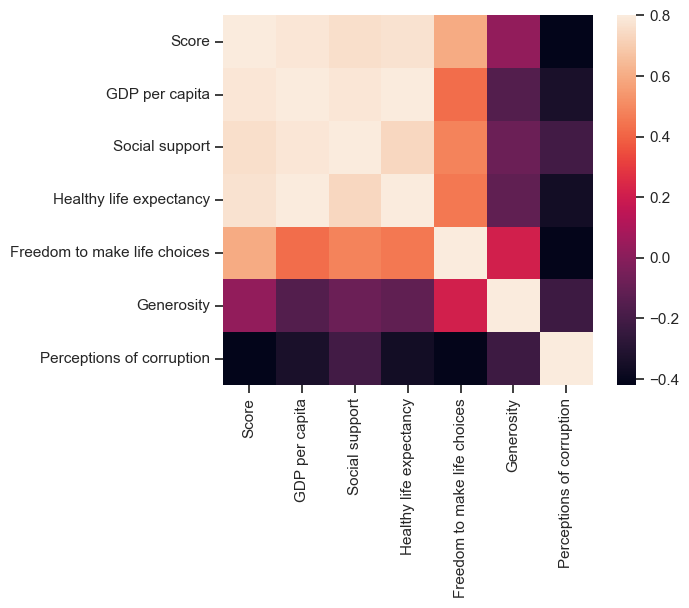

In [30]:
#Check correlation of each values 
corrmat = combined_countries_without_year.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

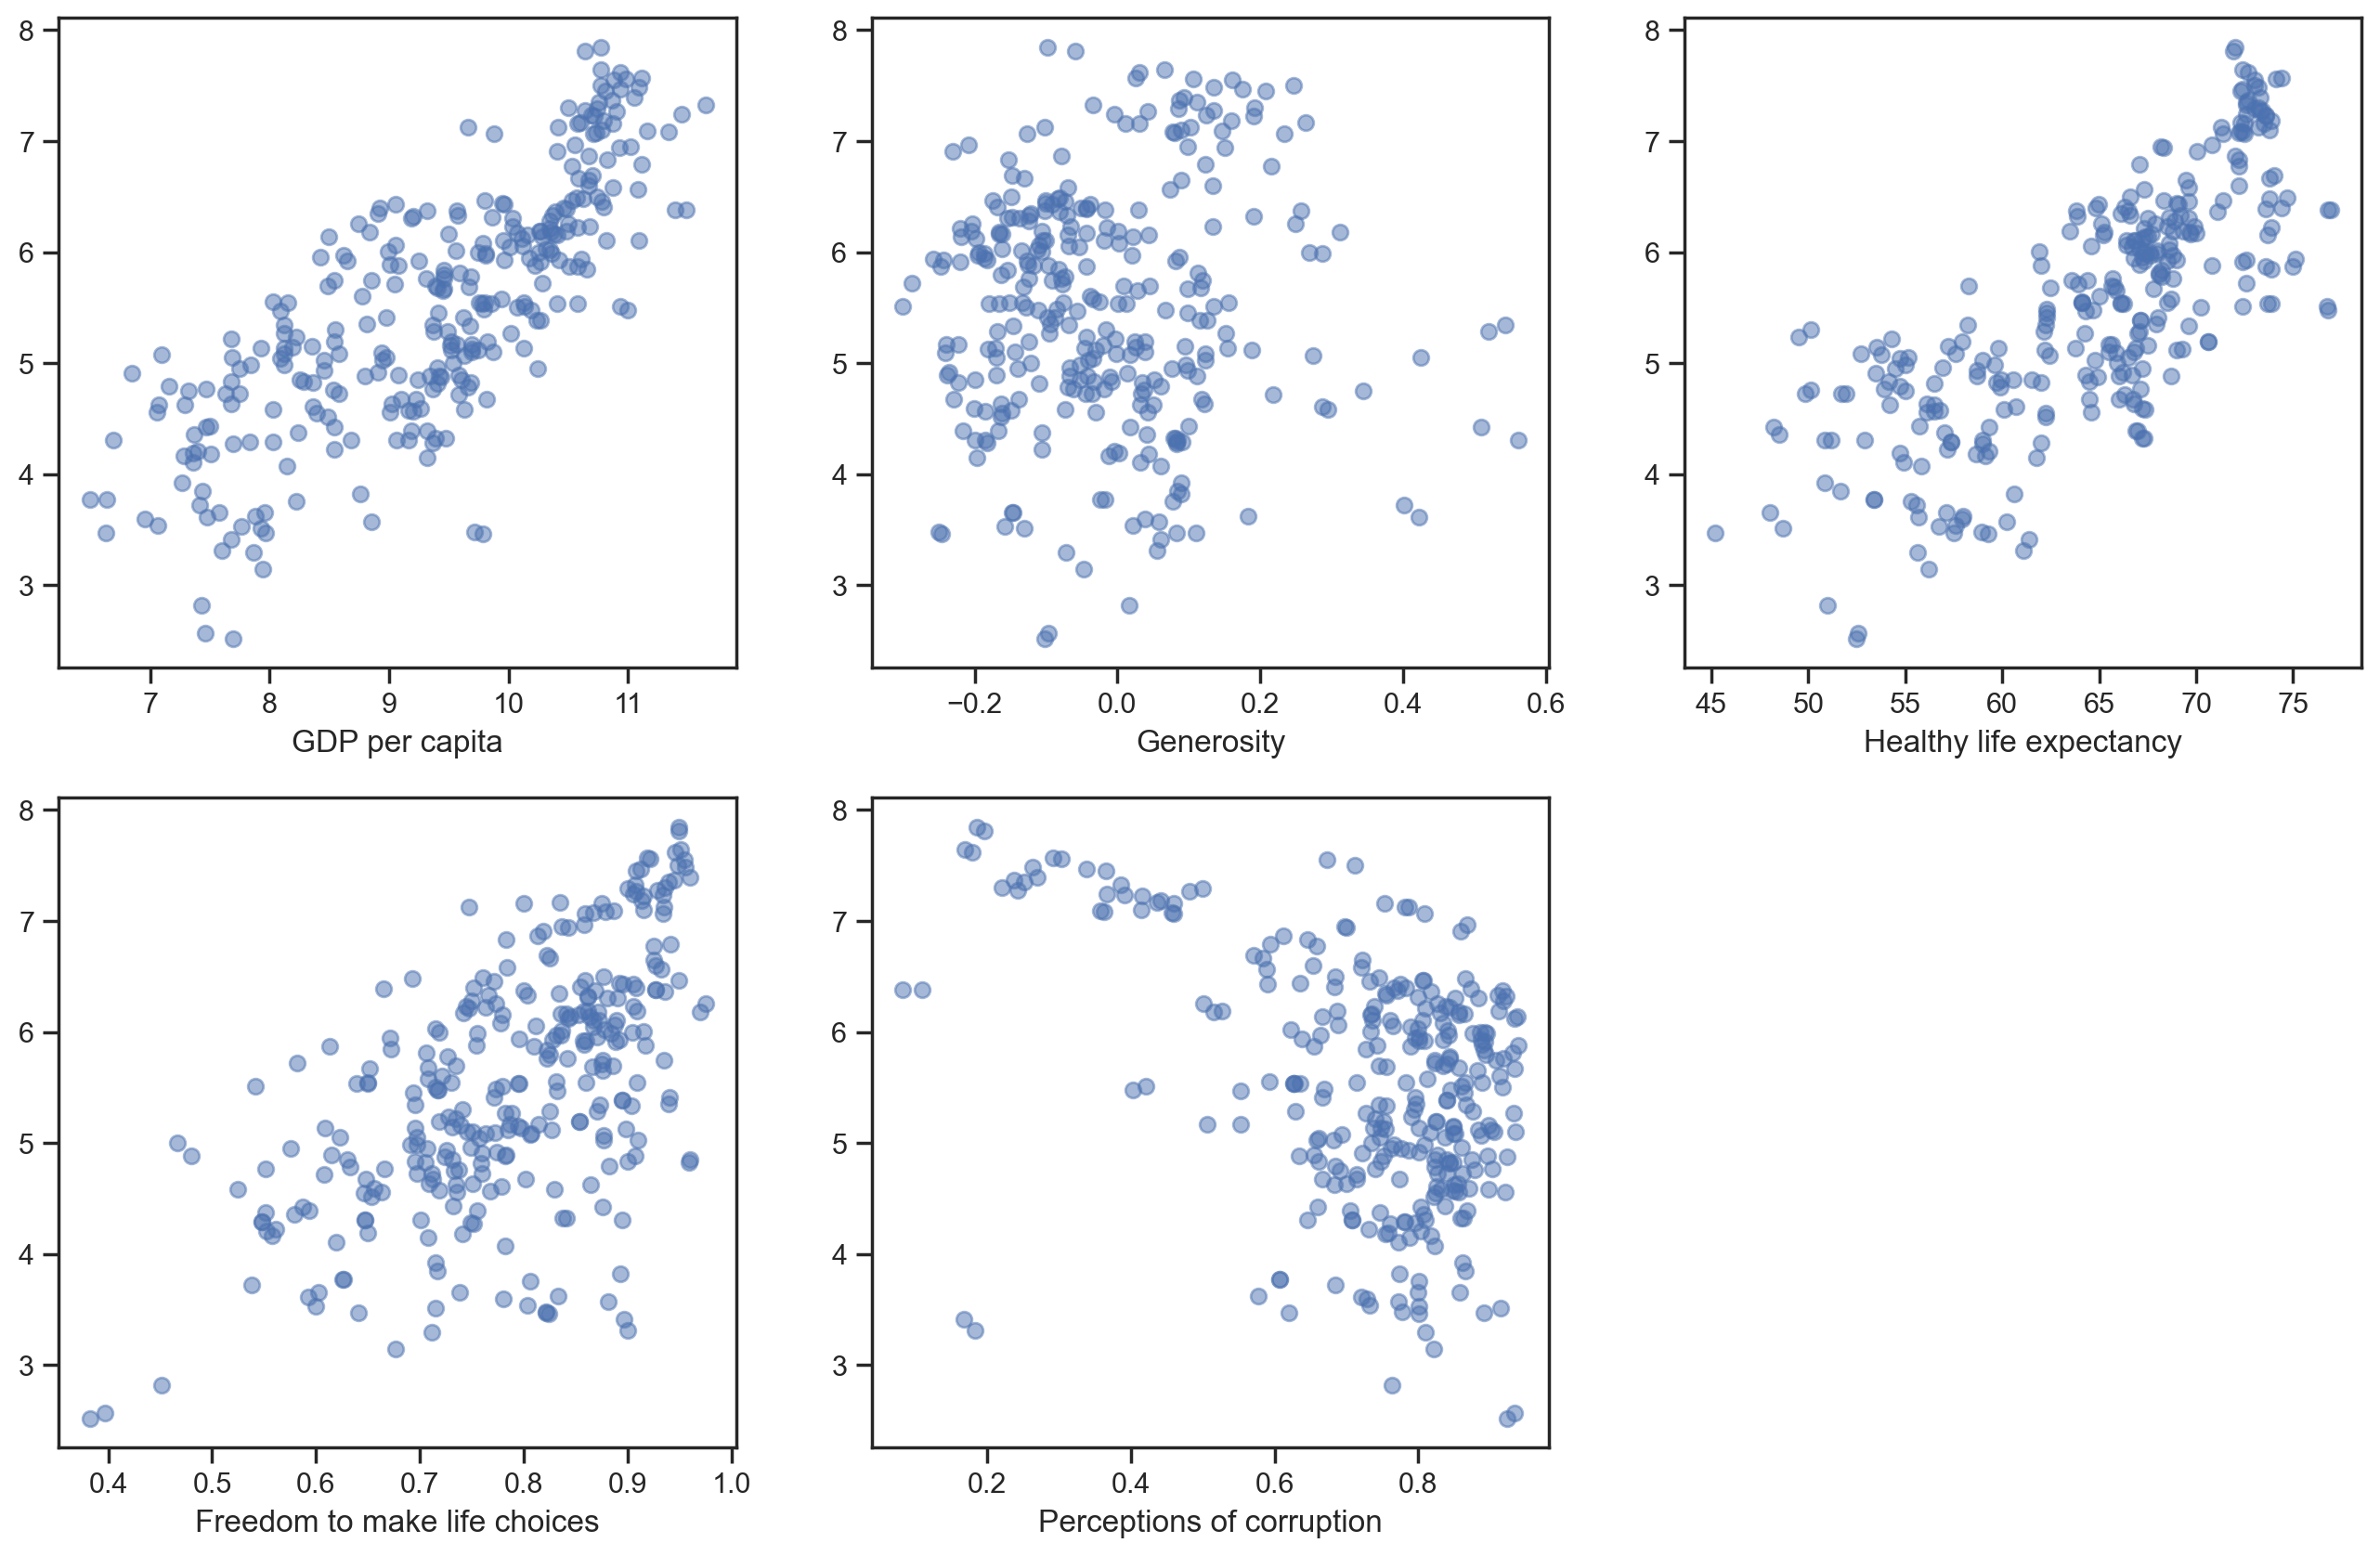

In [31]:
#let's check highly correlated columns separately 

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 10))
for i, key in enumerate(['GDP per capita', 'Generosity', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']):
    plt.subplot(2, 3, i+1)
    plt.xlabel(key)
    plt.scatter(combined_countries_without_year[key], combined_countries_without_year['Score'], alpha=0.5)

In [32]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #loading necessary libraries for mapping
init_notebook_mode(connected=True)
import plotly

data = dict(type = 'choropleth',
           locations = combined_countries['Country or region'],
           locationmode = 'country names',
           z = combined_countries['Score'], 
           text = combined_countries['Country or region'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'eckert2'}))
fig = go.Figure(data = data, layout=layout)
plotly.offline.plot(fig) 
iplot(fig)